In [1]:
#test

In [2]:
# from tqdm.notebook import trange, tqdm
import time
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


## Load Data

In [3]:
# The training data is stored in X saved as save.p
# Load dataframe
data = pd.read_csv('https://rads-reader-images.s3.us-east-2.amazonaws.com/Image_Dateframe.csv', index_col = 0)
# Use pickle to load training data
X = pickle.load( open( "save.p", "rb" ) )

In [4]:
X.shape

(112120, 150, 150)

In [5]:
X = X.reshape((112120, 150, 150, 1))

In [6]:
y = data.drop(['Image Index'], axis=1)
y = y.to_numpy()
y.shape

(112120, 15)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train[0].shape

(150, 150, 1)

## Build CNN Model

In [9]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(15, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Train on 89696 samples, validate on 22424 samples
Epoch 1/10
89696/89696 [==============================] - 166s 2ms/sample - loss: 0.2572 - acc: 0.9043 - val_loss: 0.2080 - val_acc: 0.9271
Epoch 2/10
89696/89696 [==============================] - 134s 1ms/sample - loss: 0.2079 - acc: 0.9276 - val_loss: 0.2067 - val_acc: 0.9278
Epoch 3/10
89696/89696 [==============================] - 134s 1ms/sample - loss: 0.2045 - acc: 0.9287 - val_loss: 0.2018 - val_acc: 0.9290
Epoch 4/10
89696/89696 [==============================] - 134s 1ms/sample - loss: 0.2019 - acc: 0.9294 - val_loss: 0.2035 - val_acc: 0.9285
Epoch 5/10
89696/89696 [==============================] - 134s 1ms/sample - loss: 0.2002 - acc: 0.9298 - val_loss: 0.1982 - val_acc: 0.9297
Epoch 6/10
89696/89696 [==============================] - 134s 1ms/sample - loss: 0.1991 - acc: 0.9300 - val_loss: 0.2043 - val_acc: 0.9291
Epoch 7/10
89696/89696 [==============================] - 134s 1ms/sample - loss: 0.1985 - acc: 0.9301 - val_l

In [12]:
!mkdir saved_model

In [13]:
model.save('saved_model/CNN_Model_001') 

In [38]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['acc'])
    plt.plot(epoch_range, history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

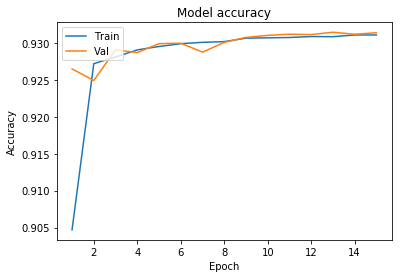

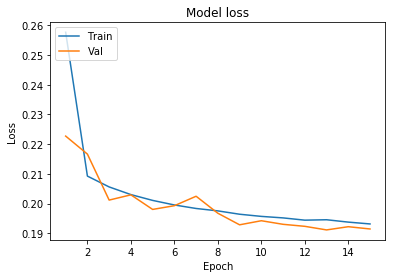

In [43]:
plot_learningCurve(history, 15)


In [14]:
img_width = 150
img_height = 150

(1, 150, 150, 3)
(1, 150, 150)
(1, 150, 150, 1)
['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
Cardiomegaly
No Finding
Infiltration


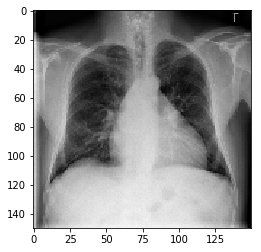

In [23]:
img = image.load_img('images/00000001_000.png', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

print(img.shape)
img = img[:,:,:,1]
print(img.shape)
img = img.reshape(1,150,150,1)
print(img.shape)

classes = list(data.columns[1:])
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
    print(classes[top3[i]])

In [24]:
def predictor(image_name='00000001_000.png'):
    img = image.load_img(f'images/{image_name}', target_size=(img_width, img_height, 3))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = img/255.0

    img = img.reshape(1, img_width, img_height, 3)

    img = img[:,:,:,1]
    img = img.reshape(1,150,150,1)

    classes = list(data.columns[1:])

    y_prob = model.predict(img)
    top3 = np.argsort(y_prob[0])[:-4:-1]

    for i in range(3):
        print(classes[top3[i]])

(1, 150, 150, 3)
(1, 150, 150)
(1, 150, 150, 1)
['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
Cardiomegaly
No Finding
Infiltration


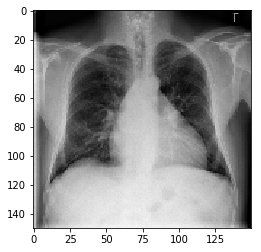

In [26]:
predictor()

[ 1 10  8]


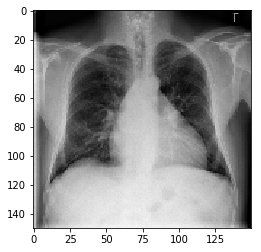

In [48]:
img = image.load_img('images/00000001_000.png', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)
img = img[:,:,:,1]
img = img.reshape(1,150,150,1)

classes = list(data.columns[1:])
y_prob = model.predict(img)
diagnosis = np.argsort(y_prob[0])[:-4:-1]

# for i in range(3):
#     print(f'#{i+1}:' + classes[top3[i]])

print(diagnosis)

In [ ]:
for ind, cond in enumerate(classes):
    if y_prob[ind] > .5:
        print(f')

y_prob[0]

In [55]:
!mkdir pickle

In [58]:
pickle.dump(model, open('pickle/model_1.p', 'wb'))

TypeError: can't pickle _thread._local objects

In [57]:
history

In [ ]:
#!pip install tqdm

In [ ]:
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# %%capture
# from tqdm import tqdm_notebook as tqdm
# tqdm().pandas()

In [2]:
# from tqdm.notebook import trange, tqdm
import time
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


In [2]:
data = pd.read_csv('https://rads-reader-images.s3.us-east-2.amazonaws.com/Image_Dateframe.csv', index_col = 0)

In [3]:
data.shape

(112120, 16)

In [4]:
start_time = time.clock()
checkpoint = -1
sec_counter = [0]

img_width = 150
img_height = 150

range_num = data.shape[0]

X = []

for i in range(range_num):
    path = 'images/' + data['Image Index'][i]
    img = image.load_img(path,target_size=(img_width,img_height, 1))
    img = image.img_to_array(img)
    img = img/255
    X.append(img)
    
    if i % (range_num/10) == 0: 
        checkpoint += 1
        seconds = time.clock() - start_time
        sec_counter.append(seconds)
        print(f'checkpoint, {(i/range_num)*100}% complete. {seconds} seconds so far')
        sec_diff = sec_counter[-1] - sec_counter[-2]
        print(f'{sec_diff * (10-checkpoint)} remaining')
    
X = np.array(X)

pickle.dump( X, open( "save.p", "wb" ) )

checkpoint, 0.0% complete. 0.020000000000000018 seconds so far
0.20000000000000018 remaining
checkpoint, 10.0% complete. 136.63 seconds so far
1229.4899999999998 remaining
checkpoint, 20.0% complete. 279.13 seconds so far
1140.0 remaining
checkpoint, 30.0% complete. 424.65 seconds so far
1018.6399999999999 remaining
checkpoint, 40.0% complete. 559.36 seconds so far
808.2600000000002 remaining
checkpoint, 50.0% complete. 687.37 seconds so far
640.05 remaining
checkpoint, 60.0% complete. 814.99 seconds so far
510.48 remaining
checkpoint, 70.0% complete. 942.5 seconds so far
382.53 remaining
checkpoint, 80.0% complete. 1071.36 seconds so far
257.7199999999998 remaining
checkpoint, 90.0% complete. 1201.9399999999998 seconds so far
130.57999999999993 remaining


OverflowError: cannot serialize a bytes object larger than 4 GiB

In [48]:
X = X[:,:,:,0]

In [49]:
pickle.dump( X, open( "save.p", "wb" ), protocol=4)

In [50]:
X.shape

(112120, 150, 150)

In [10]:
### Load the training array

In [11]:
start_time = time.clock()

# import pickle

X = pickle.load( open( "save.p", "rb" ) )

time_elapsed = time.clock() - start_time
print(time_elapsed)

34.36999999999989


In [ ]:
import matplotlib.pyplot as plt
import cv2

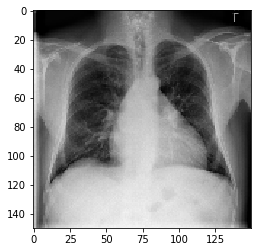

In [51]:
# img_name='00000001_000.png':
# img_array=cv2.imread('images/'+img_name)
plt.imshow(X[0],cmap="gray")
plt.show()

In [24]:
avg_array = []

for num in X:
    for nums in num:
        avg_array.append(np.mean(nums))
        
X_ = np.array(avg_array)

In [26]:
training_data = []
for img_name in self.ClassificationDf()['Image Index'][:n_images]:
    class_num = self.IndexedDf().loc[img_name]['cardiomegaly']
    img_array=cv2.imread('images/'+img_name) #creating image array
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    avg_array = []
    for num in new_array:
        for nums in num:
            avg_array.append(np.mean(nums))
    training_data.append([img_name, avg_array, class_num])

(16818000,)

In [43]:
X[0]

array([[[0.7372549 , 0.7372549 , 0.7372549 ],
        [0.6745098 , 0.6745098 , 0.6745098 ],
        [0.3764706 , 0.3764706 , 0.3764706 ],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784]],

       [[0.6666667 , 0.6666667 , 0.6666667 ],
        [0.3019608 , 0.3019608 , 0.3019608 ],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784]],

       [[0.5411765 , 0.5411765 , 0.5411765 ],
        [0.18039216, 0.18039216, 0.18039216],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784]],

       ...,

       [[0.98039216, 0.98039216, 0.98039216],
        [0.73333335, 0.73333335, 0.73333335],
        [0.5019608 , 0

In [37]:
X_.shape

(112120, 150, 150, 3)

In [39]:
X[0].shape

(150, 150, 3)

In [41]:
x_0 = np.mean(X[0], axis=2)

In [46]:
x_j = X[:,:,:,0]

In [47]:
x_j.shape

(112120, 150, 150)

In [ ]:
start_time = time.clock()
checkpoint = -1
sec_counter = [0]

img_width = 150
img_height = 150

range_num = data.shape[0]

X = []

for i in range(range_num):
    path = 'images/' + data['Image Index'][i]
    img = image.load_img(path,target_size=(img_width,img_height, 1))
    img = image.img_to_array(img)
    img = img/255
    X.append(img)
    
    if i % (range_num/10) == 0: 
        checkpoint += 1
        seconds = time.clock() - start_time
        sec_counter.append(seconds)
        print(f'checkpoint, {(i/range_num)*100}% complete. {seconds} seconds so far')
        sec_diff = sec_counter[-1] - sec_counter[-2]
        print(f'{sec_diff * (10-checkpoint)} remaining')
    
X = np.array(X)

pickle.dump( X, open( "save.p", "wb" ) )

In [ ]:
img_width = 150
img_height = 150

X = []

for i in tqdm(range(data.shape[0])):
    path = 'images/' + data['Image Index'][i]
    img = image.load_img(path,target_size=(img_width,img_height, 1))
    img = image.img_to_array(img)
    img = img/255
    X.append(img)
    
X = np.array(X)

In [118]:
    path = 'images/' + data['Image Index'][i]
    img = image.load_img(path,target_size=(img_width,img_height, 1))
    img = image.img_to_array(img)
    img = img/255
    X.append(img)
    X = np.array(X)

In [119]:
X.shape

(3, 3, 350, 350)

In [120]:
X

array([[[[0.76862746, 0.7529412 , 0.7372549 , ..., 0.01960784,
          0.01960784, 0.00784314],
         [0.7529412 , 0.7176471 , 0.7058824 , ..., 0.01960784,
          0.01960784, 0.00784314],
         [0.7294118 , 0.7019608 , 0.6392157 , ..., 0.01960784,
          0.01960784, 0.00784314],
         ...,
         [0.99607843, 0.9843137 , 0.88235295, ..., 0.        ,
          0.        , 0.        ],
         [1.        , 0.972549  , 0.89411765, ..., 0.        ,
          0.        , 0.        ],
         [1.        , 0.9882353 , 0.88235295, ..., 0.        ,
          0.        , 0.        ]],

        [[0.76862746, 0.7529412 , 0.7372549 , ..., 0.01960784,
          0.01960784, 0.00784314],
         [0.7529412 , 0.7176471 , 0.7058824 , ..., 0.01960784,
          0.01960784, 0.00784314],
         [0.7294118 , 0.7019608 , 0.6392157 , ..., 0.01960784,
          0.01960784, 0.00784314],
         ...,
         [0.99607843, 0.9843137 , 0.88235295, ..., 0.        ,
          0.        , 0. 

In [97]:
df['Image Index']

0         00000001_000.png
1         00000001_001.png
2         00000001_002.png
3         00000002_000.png
4         00000003_000.png
5         00000003_001.png
6         00000003_002.png
7         00000003_003.png
8         00000003_004.png
9         00000003_005.png
10        00000003_006.png
11        00000003_007.png
12        00000004_000.png
13        00000005_000.png
14        00000005_001.png
15        00000005_002.png
16        00000005_003.png
17        00000005_004.png
18        00000005_005.png
19        00000005_006.png
20        00000005_007.png
21        00000006_000.png
22        00000007_000.png
23        00000008_000.png
24        00000008_001.png
25        00000008_002.png
26        00000009_000.png
27        00000010_000.png
28        00000011_000.png
29        00000011_001.png
                ...       
112090    00030786_000.png
112091    00030786_001.png
112092    00030786_002.png
112093    00030786_003.png
112094    00030786_004.png
112095    00030786_005.png
1

In [96]:
df['Image Index']['00000001_000.png']

KeyError: '00000001_000.png'

In [58]:
import pandas as pd

In [88]:
df = pd.read_csv('https://rads-reader-images.s3.us-east-2.amazonaws.com/Image_Dateframe.csv', index_col = 0)

In [98]:
df.tail()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
112115,00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112119,00030805_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [90]:
df.columns

Index(['Image Index', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

In [66]:
conditions = ['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [69]:
# import pandas as pd
# import shutil

# Creating directories for all classes

# df = pd.read_csv('https://rads-reader-images.s3.us-east-2.amazonaws.com/Image_Dateframe.csv', index_col = 0)

# conditions = ['Atelectasis',
#  'Cardiomegaly',
#  'Consolidation',
#  'Edema',
#  'Effusion',
#  'Emphysema',
#  'Fibrosis',
#  'Hernia',
#  'Infiltration',
#  'Mass',
#  'No Finding',
#  'Nodule',
#  'Pleural_Thickening',
#  'Pneumonia',
#  'Pneumothorax']

# import os

# root_path = '/home/ec2-user/SageMaker/x-ray-disease-classification'
# folders = conditions
# for folder in folders:
#     os.mkdir(os.path.join(root_path,folder))



In [78]:
import shutil

In [71]:
shutil.copy('/home/ec2-user/SageMaker/x-ray-disease-classification/images/00000001_000.png', 
            '/home/ec2-user/SageMaker/x-ray-disease-classification/data/Cardiomegaly/')

'/home/ec2-user/SageMaker/x-ray-disease-classification/data/Cardiomegaly/00000001_000.png'

In [84]:
img = "00000002_000.png"
cond = "Cardiomegaly"

shutil.copy(f'/home/ec2-user/SageMaker/x-ray-disease-classification/images/{img}', 
            f'/home/ec2-user/SageMaker/x-ray-disease-classification/data/{cond}/')

'/home/ec2-user/SageMaker/x-ray-disease-classification/data/Cardiomegaly/00000002_000.png'

In [72]:
for ind in df.index[:5]:
    for col in df.columns:
        if df.iloc[ind][col] == 1:
            print(df.iloc[ind]['Image Index']+f': {col}')


00000001_000.png: Cardiomegaly
00000001_001.png: Cardiomegaly
00000001_001.png: Emphysema
00000001_002.png: Cardiomegaly
00000001_002.png: Effusion
00000002_000.png: No Finding
00000003_000.png: Hernia


In [86]:
for ind in df.index[:5]:
    img = df.iloc[ind]['Image Index']
    for col in df.columns:
        if df.iloc[ind][col] == 1:
            print(img + ': ' + col)
            shutil.copy(f'/home/ec2-user/SageMaker/x-ray-disease-classification/images/{img}', 
            f'/home/ec2-user/SageMaker/x-ray-disease-classification/data/{col}/')

00000001_000.png: Cardiomegaly
00000001_001.png: Cardiomegaly
00000001_001.png: Emphysema
00000001_002.png: Cardiomegaly
00000001_002.png: Effusion
00000002_000.png: No Finding
00000003_000.png: Hernia


In [92]:
# Commands to run in the terminal to copy files to their correct folders

# import pandas as pd
# import shutil
# import os

# Creating directories for all classes

# df = pd.read_csv('https://rads-reader-images.s3.us-east-2.amazonaws.com/Image_Dateframe.csv', index_col = 0)

# conditions = ['Atelectasis',
#  'Cardiomegaly',
#  'Consolidation',
#  'Edema',
#  'Effusion',
#  'Emphysema',
#  'Fibrosis',
#  'Hernia',
#  'Infiltration',
#  'Mass',
#  'No Finding',
#  'Nodule',
#  'Pleural_Thickening',
#  'Pneumonia',
#  'Pneumothorax']


# root_path = '/home/ec2-user/SageMaker/x-ray-disease-classification'
# folders = conditions
# for folder in folders:
#     os.mkdir(os.path.join(root_path,folder))


# for ind in df.index:
#     img = df.iloc[ind]['Image Index']
#     for col in df.columns:
#         if df.iloc[ind][col] == 1:
#             print(img + ': ' + col)
#             shutil.copy(f'/home/ec2-user/SageMaker/x-ray-disease-classification/images/{img}', 
#             f'/home/ec2-user/SageMaker/x-ray-disease-classification/data/{col}/')

In [35]:
import pandas as pd

In [36]:
labels = pd.read_csv("https://rads-reader.s3.us-east-2.amazonaws.com/data/categorical.csv")

In [87]:
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [37]:
images = labels['Image Index']

In [38]:
dummies = (labels['Finding Labels']).str.get_dummies()

In [39]:
dummies.columns

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [40]:
df = pd.concat([images,dummies], axis = 1)

In [41]:
df.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
df.to_csv('Image_Dateframe.csv')

In [43]:
df.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
df = pd.read_csv('Image_Dateframe.csv')

In [49]:
df = df.drop(columns=['Unnamed: 0'])

In [20]:
#Need to write a script to cp files conditionally 

In [ ]:
import os

root_path = '/whatever/your/root/path/is/'
folders = ['Folder_1','Folder_x','Folder_y']
for folder in folders:
    os.mkdir(os.path.join(root_path,folder))

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters

matplotlib.style.use('ggplot')

In [2]:
labels = pd.read_csv("https://rads-reader.s3.us-east-2.amazonaws.com/data/categorical.csv")
conditions = ['Cardiomegaly','Emphysema','Effusion',
              'Hernia','No Finding','Infiltration',
              'Nodule','Mass','Pneumothorax','Atelectasis',
             'Pleural_Thickening','Fibrosis']
for condition in conditions:
    labels[condition] = [1 if condition in x else 0 for x in labels['Finding Labels']]
df = labels[['Image Index',
       'Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'No Finding',
       'Infiltration', 'Nodule', 'Mass', 'Pneumothorax', 'Atelectasis',
       'Pleural_Thickening', 'Fibrosis']]

In [3]:
df.head(1)

,Image Index,Cardiomegaly,Emphysema,Effusion,Hernia,No Finding,Infiltration,Nodule,Mass,Pneumothorax,Atelectasis,Pleural_Thickening,Fibrosis
0,00000001_000.png,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
indexed_w_all = df.set_index('Image Index')
indexed_w_all.head(1)

,Cardiomegaly,Emphysema,Effusion,Hernia,No Finding,Infiltration,Nodule,Mass,Pneumothorax,Atelectasis,Pleural_Thickening,Fibrosis
Image Index,,,,,,,,,,,,
00000001_000.png,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
indexed_w_all.head()

,Cardiomegaly,Emphysema,Effusion,Hernia,No Finding,Infiltration,Nodule,Mass,Pneumothorax,Atelectasis,Pleural_Thickening,Fibrosis
Image Index,,,,,,,,,,,,
00000001_000.png,1,0,0,0,0,0,0,0,0,0,0,0
00000001_001.png,1,1,0,0,0,0,0,0,0,0,0,0
00000001_002.png,1,0,1,0,0,0,0,0,0,0,0,0
00000002_000.png,0,0,0,0,1,0,0,0,0,0,0,0
00000003_000.png,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
for img_name in df['Image Index'][:5]:
    print(img_name)

00000001_000.png
00000001_001.png
00000001_002.png
00000002_000.png
00000003_000.png


In [23]:
import shutil  
# shutil.copyfile('/path/to/file', '/path/to/other/phile')

In [26]:
!pwd

/home/ec2-user/SageMaker/x-ray-disease-classification


In [27]:
shutil.copy('images/00000001_000.png', '/test_images')

PermissionError: [Errno 13] Permission denied: '/test_images'

In [21]:
for img_name in df['Image Index'][:15]:
    shutil.copy(f'images/{img_name}', f'/test_images/{img_name}')

FileNotFoundError: [Errno 2] No such file or directory: '/test_images/00000001_000.png'

In [11]:
!pwd

/home/ec2-user/SageMaker/x-ray-disease-classification


In [12]:
!mkdir test_images

In [15]:
!ls

cnn_tests.ipynb  rads_reader_ec2.py  smaple_training_data.csv
images		 rads_reader_s3.py   src.py
__pycache__	 README.md	     test_images


In [5]:
def HalfConditionDf( condition = 'Hernia', small_sample = False):

    if small_sample == False:
        
        nofinding_df = df[df['No Finding'] == 1]
        nofinding_df_len = nofinding_df.iloc[:sum(df[condition])]
        condition_df = df[df[condition] == 1]
        half_condition_df = pd.concat([nofinding_df_len, condition_df])
        half_condition_df = half_condition_df[['Image Index', condition]]
        half_condition_df = half_condition_df.sample(frac=1)
        indexed_w_all = df.set_index('Image Index')
        training_data= []
        for img_name in half_condition_df['Image Index']:
            condition_pos = indexed_w_all.loc[img_name][condition]
            img_array = imread(f'images/{img_name}', as_grey=True)
            new_array = rescale(img_array, 1/3, mode='reflect')
            hog_array = hog(
                            new_array, pixels_per_cell=(12, 12),
                            cells_per_block=(2,2),
                            orientations=8,
                            visualise=False,
                            block_norm='L2-Hys')
            training_data.append([img_name, hog_array, condition_pos])
        hog_df = pd.DataFrame(training_data)
        hog_df = hog_df.rename(columns={0: "img_name", 
                                        1: "hog_array", 
                                        2: condition})
        smol_df = hog_df.apply(pd.Series)
        matrix_df = hog_df.hog_array.apply(pd.Series)
        df_merged = pd.concat([smol_df, matrix_df], axis=1, sort=False)
        df_merged = df_merged.drop('hog_array', axis = 1)
        return df_merged

    else:
        
        nofinding_df = df[df['No Finding'] == 1]
        nofinding_df_len = nofinding_df.iloc[:small_sample]
        condition_df = df[df[condition] == 1].iloc[:small_sample]
        half_condition_df = pd.concat([nofinding_df_len, condition_df])
        half_condition_df = half_condition_df[['Image Index', condition]]
        half_condition_df = half_condition_df.sample(frac=1)
        indexed_w_all = df.set_index('Image Index')
        training_data= []
        for img_name in half_condition_df['Image Index']:
            condition_pos = indexed_w_all.loc[img_name][condition]
            img_array = imread(f'images/{img_name}', as_grey=True)
            new_array = rescale(img_array, 1/3, mode='reflect')
            hog_array= hog(
                new_array, pixels_per_cell=(12, 12),
                cells_per_block=(2,2),
                orientations=8,
                visualise=False,
                block_norm='L2-Hys')
            training_data.append([img_name, hog_array, condition_pos])
        hog_df = pd.DataFrame(training_data)
        hog_df = hog_df.rename(columns={0: "img_name", 
                                        1: "hog_array", 
                                        2: condition})
        smol_df = hog_df.apply(pd.Series)
        matrix_df = hog_df.hog_array.apply(pd.Series)
        df_merged = pd.concat([smol_df, matrix_df], axis=1, sort=False)
        df_merged = df_merged.drop('hog_array', axis = 1)
        return df_merged

In [6]:
smol_training = HalfConditionDf()

NameError: name 'imread' is not defined